In [25]:
import pandas as pd
data =  pd.read_excel("/Volumes/17194110228/projects/PycharmProjects汪雷/data.xlsx",sheet_name="C-exvol")
print(data)

       Wt     V   Radius       μ      ZP    Mob   Cond     lnr
0   0.001  6.047  26.659  0.0041  -5.751 -0.526  3.096  0.0000
1   0.005  7.074  29.476  0.0412  -7.958 -0.727  3.108 -0.0001
2   0.010  8.894  33.858  0.2144  -8.121 -0.742  3.063 -0.0005
3   0.050  8.353  32.623  0.4527  -4.757 -0.435  2.772 -0.0021
4   0.100  6.448  27.793  0.7191  -1.487 -0.136  2.504 -0.0019
..    ...    ...     ...     ...     ...    ...    ...     ...
70  0.001  6.199  27.850  0.0009 -16.017 -1.465  0.564 -0.0005
71  0.005  7.793  32.043  0.0045 -15.383 -1.406  0.618 -0.0045
72  0.010  5.591  26.060  0.0091 -13.517 -1.237  0.666 -0.0031
73  0.050  3.268  17.683  0.0472 -10.370 -0.948  1.032  0.0041
74  0.100  2.525  14.167  0.0997 -10.318 -0.943  1.377  0.0139

[75 rows x 8 columns]


In [26]:
X = data.iloc[:,0:7]
y = data.iloc[:,7]
X = X.to_numpy()
y = y.to_numpy()
X,y

(array([[ 1.0000e-03,  6.0470e+00,  2.6659e+01,  4.1000e-03, -5.7510e+00,
         -5.2600e-01,  3.0960e+00],
        [ 5.0000e-03,  7.0740e+00,  2.9476e+01,  4.1200e-02, -7.9580e+00,
         -7.2700e-01,  3.1080e+00],
        [ 1.0000e-02,  8.8940e+00,  3.3858e+01,  2.1440e-01, -8.1210e+00,
         -7.4200e-01,  3.0630e+00],
        [ 5.0000e-02,  8.3530e+00,  3.2623e+01,  4.5270e-01, -4.7570e+00,
         -4.3500e-01,  2.7720e+00],
        [ 1.0000e-01,  6.4480e+00,  2.7793e+01,  7.1910e-01, -1.4870e+00,
         -1.3600e-01,  2.5040e+00],
        [ 1.0000e-03,  4.0875e+01,  7.3388e+01,  2.0500e-02, -5.8260e+00,
         -5.3200e-01,  3.1400e+00],
        [ 5.0000e-03,  4.1333e+01,  7.3756e+01,  2.0720e-01, -3.3000e+00,
         -3.0200e-01,  3.2080e+00],
        [ 1.0000e-02,  2.3197e+01,  5.6320e+01,  1.0798e+00, -5.0170e+00,
         -4.5800e-01,  3.1110e+00],
        [ 5.0000e-02,  2.2627e+01,  5.5642e+01,  2.2804e+00, -5.3900e+00,
         -4.9200e-01,  2.7320e+00],
        [ 

In [27]:
import numpy as np
from sklearn import preprocessing

std = preprocessing.StandardScaler()
std.fit(X)
X = std.transform(X)
std.mean_,std.scale_ #fit之后求出了原始数据每列均值和标准差

(array([ 3.32000000e-02,  1.18525600e+01,  3.73842800e+01,  5.01608000e-01,
        -1.07567333e+01, -9.83106667e-01,  2.85146667e+00]),
 array([ 0.03772214, 14.72342069, 21.05719722,  0.98052724,  4.99652782,
         0.45665466,  2.88770777]))

In [28]:
X,y

(array([[-8.53610062e-01, -3.94307826e-01, -5.09340340e-01,
         -5.07388249e-01,  1.00184238e+00,  1.00098981e+00,
          8.46807755e-02],
        [-7.47571545e-01, -3.24555013e-01, -3.75561853e-01,
         -4.69551463e-01,  5.60135645e-01,  5.60832259e-01,
          8.88363206e-02],
        [-6.15023399e-01, -2.00942435e-01, -1.67461983e-01,
         -2.92911801e-01,  5.27512990e-01,  5.27984680e-01,
          7.32530263e-02],
        [ 4.45361771e-01, -2.37686613e-01, -2.26111764e-01,
         -4.98792874e-02,  1.20078053e+00,  1.20026512e+00,
         -2.75189434e-02],
        [ 1.77084323e+00, -3.67072307e-01, -4.55487019e-01,
          2.21811278e-01,  1.85523501e+00,  1.85502686e+00,
         -1.20326118e-01],
        [-8.53610062e-01,  1.97117508e+00,  1.70980590e+00,
         -4.90662554e-01,  9.86831958e-01,  9.87850782e-01,
          9.99177743e-02],
        [-7.47571545e-01,  2.00228198e+00,  1.72728211e+00,
         -3.00254789e-01,  1.49238303e+00,  1.49151366e+00

# 非线性回归

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 非线性回归
ployfeat = PolynomialFeatures(degree=2,include_bias=False)  # 根据degree的值转换为相应的多项式（非线性回归）
x_p = ployfeat.fit_transform(X)
model = LinearRegression()
model.fit(x_p, y)

model.coef_,model.intercept_

(array([-2.18346512e-02, -1.96869129e-02, -6.08411696e-03, -5.24427996e-02,
         5.06850683e+00, -5.04273217e+00, -1.61036838e-02,  1.85670195e-03,
         8.27189816e-03, -2.15802665e-02, -1.05032189e-02,  3.27855709e+00,
        -3.28044831e+00,  6.38698356e-03, -3.57604323e-03,  9.52752206e-03,
        -2.70110028e-02, -8.97925460e-01,  8.97286576e-01, -1.03504620e-03,
        -9.16844207e-04,  1.38253914e-02,  8.28060662e-01, -8.28571974e-01,
         1.03791776e-03,  6.96880120e-04,  5.47011136e+00, -5.41596939e+00,
        -2.83422858e-02, -8.43963545e+01,  1.69049456e+02,  1.34135545e+00,
        -8.46538049e+01, -1.34766450e+00,  3.15982637e-03]),
 -0.043475660448479746)

In [33]:
test = np.array([0.001,6.0470,26.6590,0.0041,-5.7510,-0.5260,3.0960]).reshape((1,-1))
test = std.transform(test)
test = ployfeat.transform(test)
model.predict(test)

array([0.00066808])

In [34]:
from sklearn.metrics import explained_variance_score
score = explained_variance_score(model.predict(ployfeat.transform(X)), y)
print(score)

0.9679161117791545


# K FOLD

In [50]:
def print_formula(feature_names,coefs):
    equation = "y = "
    for i, name in enumerate(feature_names):
        coef = coefs[i]
        if coef >= 0:
            eq = " + " + str(coef) + "*" + name  
        else:
            eq = " - " + str(-coef) + "*" + name
        equation += eq
    
    equation += " + " + str(model.intercept_)  

    
    print(equation)

y =  + 5009413737.64921*1 - 0.021417218876591107*x0 - 0.017908163365306748*x1 - 0.007375744596366648*x2 - 0.05123310173660393*x3 + 4.798511348325829*x4 - 4.7729489338771085*x5 - 0.015495095972254697*x6 + 0.0016257853383068895*x0^2 + 0.008700416936190065*x0 x1 - 0.02143627798978956*x0 x2 - 0.010044497846383933*x0 x3 + 3.5986547940693248*x0 x4 - 3.600688713850706*x0 x5 + 0.004936928105201191*x0 x6 - 0.0026674300610762995*x1^2 + 0.008272744299048581*x1 x2 - 0.026869291173208236*x1 x3 - 1.10088070140219*x1 x4 + 1.1003167369562634*x1 x5 - 0.0024951739156013476*x1 x6 - 0.001255581449373032*x2^2 + 0.014015482623918048*x2 x3 + 1.1402447461933891*x2 x4 - 1.1416612838889002*x2 x5 + 0.0030210894042293837*x2 x6 + 0.0008997919164300682*x3^2 + 5.741818136567213*x3 x4 - 5.690156017986177*x3 x5 - 0.02763175939322263*x3 x6 - 36.82781641414258*x4^2 + 73.3443695168355*x4 x5 + 1.0296795357535735*x4 x6 - 36.51595087053943*x5^2 - 1.0328328000628029*x5 x6 + 0.002835213421624221*x6^2 + -5009413737.692533
(-2.

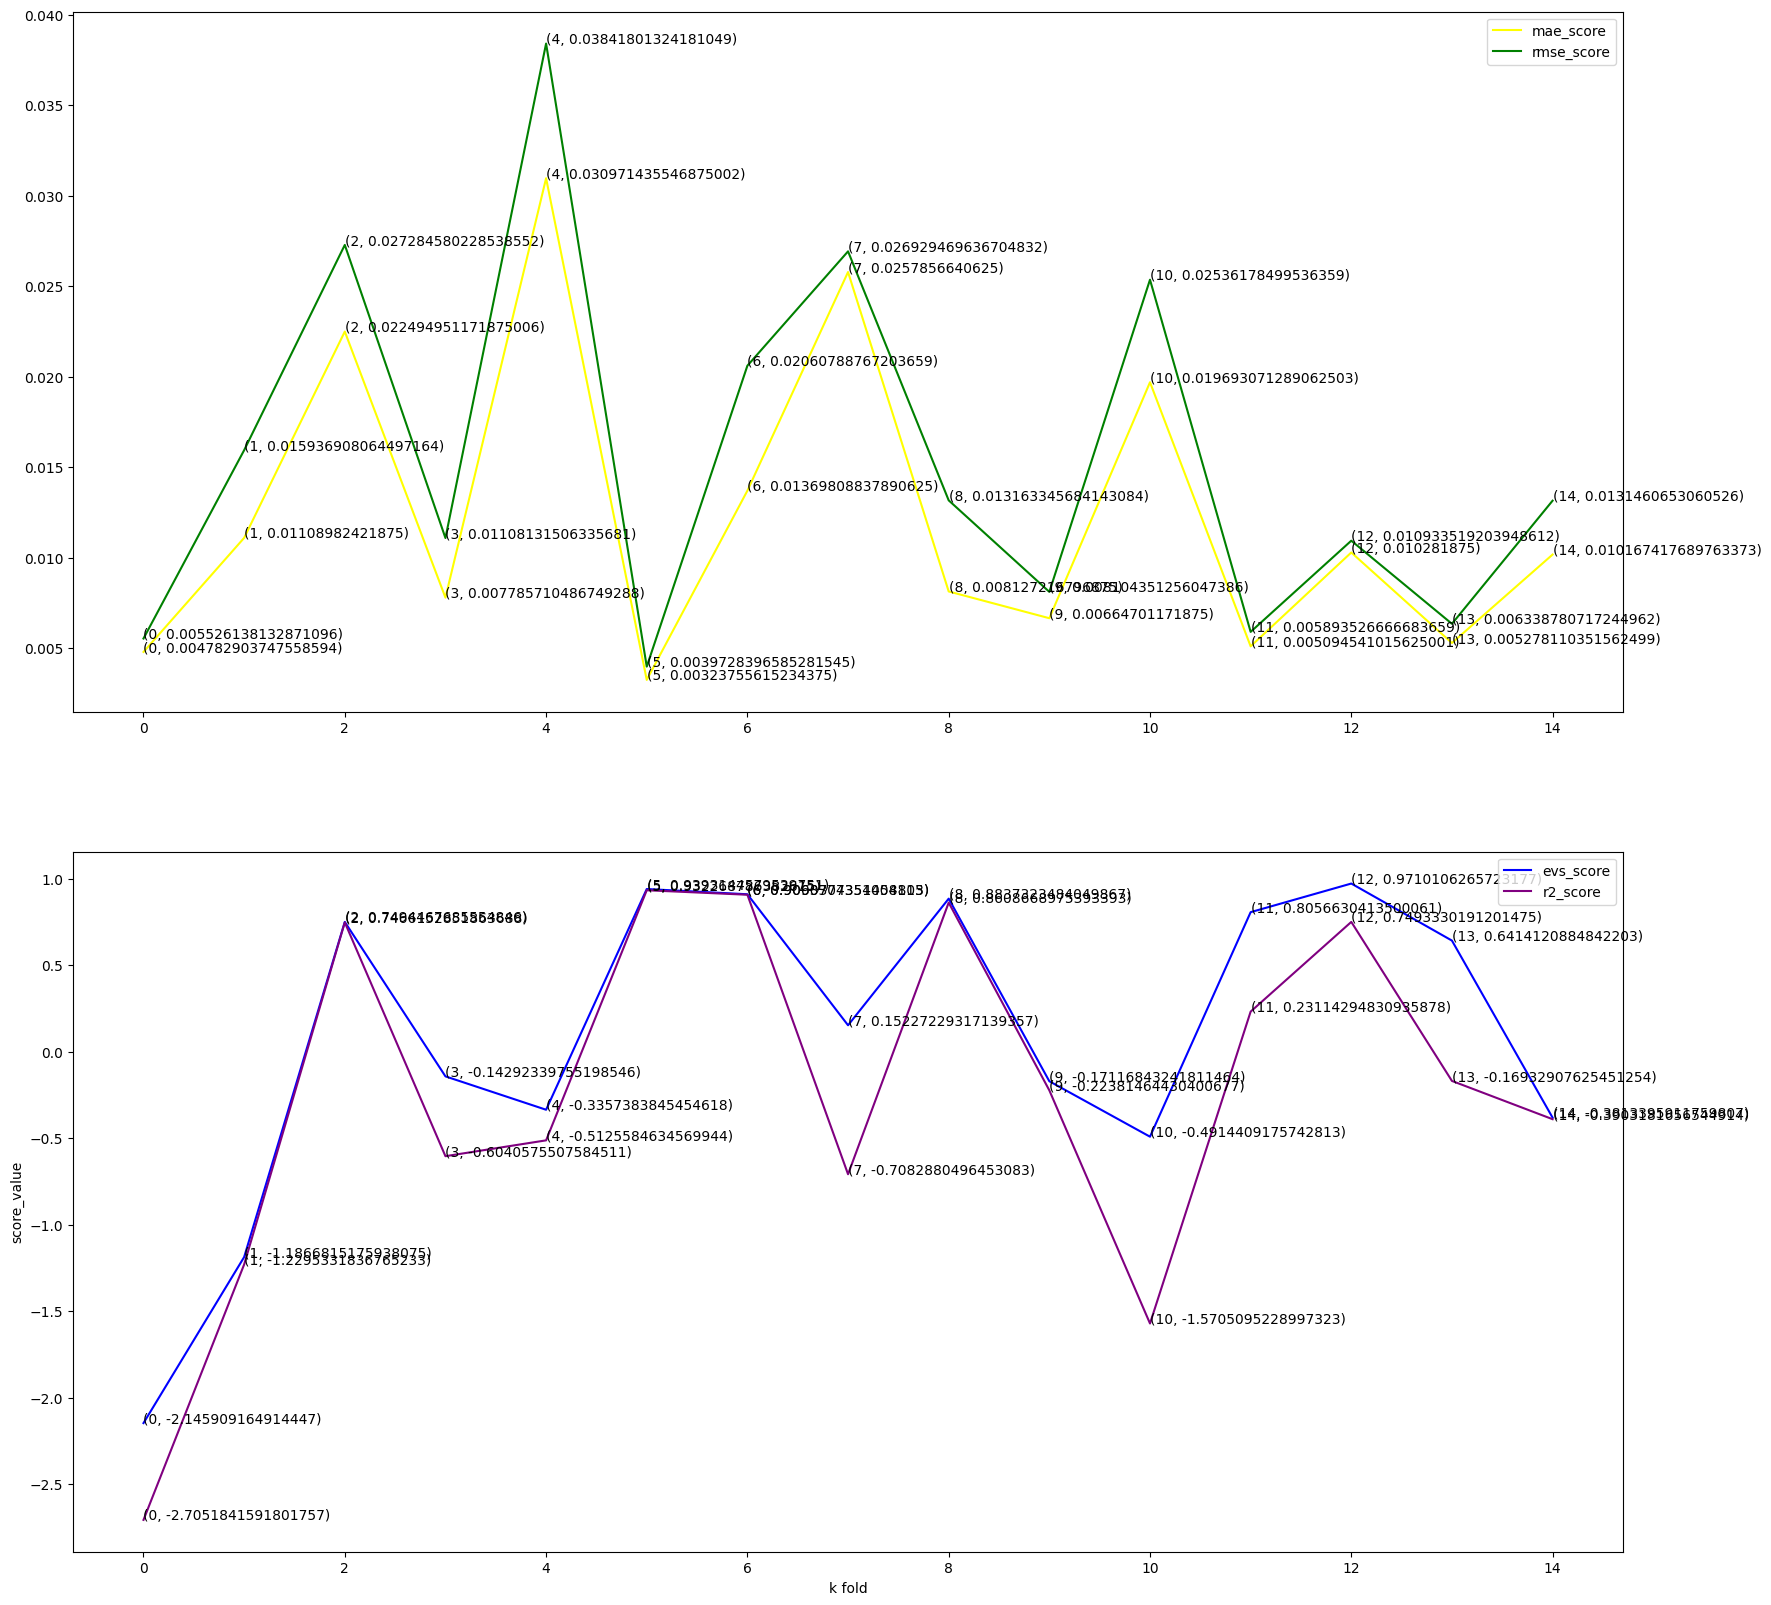

In [51]:
%matplotlib inline

import pandas as pd
import math
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
# 计算不同的指标
def calc_metrics(y_test,y_pred):
    evs_score = explained_variance_score(y_pred, y_test)
    mae_score = mean_absolute_error(y_pred,y_test)
    rmse_score = math.sqrt(mean_squared_error(y_pred, y_test))
    r2score = r2_score(y_pred, y_test)
    return evs_score,mae_score,rmse_score,r2score

# 读取数据
data =  pd.read_excel("/Volumes/17194110228/projects/PycharmProjects汪雷/data.xlsx",sheet_name="C-exvol")
# 读取X，y
X = data.iloc[:,0:7]
y = data.iloc[:,7]
X = X.to_numpy()
y = y.to_numpy()
# 进行标准化
std = preprocessing.StandardScaler()
std.fit(X)
X = std.transform(X)


kfold_splits_num = 15
# k折训练，计算
kf = KFold(n_splits=kfold_splits_num, shuffle=True, random_state=42)

# 画图
plt.figure(figsize=(20,20))

evs_score_list,mae_score_list,rmse_score_list,r2score_list = [],[],[],[]
for index,(train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # 非线性回归
    ployfeat = PolynomialFeatures(degree=2)  # 根据degree的值转换为相应的多项式（非线性回归）
    model = LinearRegression()
    model.fit(ployfeat.fit_transform(X_train), y_train)
    y_pred = model.predict(ployfeat.fit_transform(X_test))
    scores = calc_metrics(y_test,y_pred)
    evs_score_list.append(scores[0])
    mae_score_list.append(scores[1])
    rmse_score_list.append(scores[2])
    r2score_list.append(scores[3])
    print_formula(ployfeat.get_feature_names_out(),model.coef_)
    print(scores)
plt.subplot(2,1,1)
plt.plot(range(kfold_splits_num),mae_score_list,label="mae_score",c="yellow")
plt.plot(range(kfold_splits_num),rmse_score_list,label="rmse_score",c="g")
plt.legend()

for x,y in zip(range(kfold_splits_num), mae_score_list):
    plt.annotate(str((x,y)), (x,y))
    
for x,y in zip(range(kfold_splits_num), rmse_score_list):
    plt.annotate(str((x,y)), (x,y))

plt.subplot(2,1,2)
plt.plot(range(kfold_splits_num),evs_score_list,label="evs_score",c="b")
plt.plot(range(kfold_splits_num),r2score_list,label="r2_score",c="purple")

# 给每个点添加坐标信息  
for x,y in zip(range(kfold_splits_num), evs_score_list):
    plt.annotate(str((x,y)), (x,y), rotation=0)


for x,y in zip(range(kfold_splits_num), r2score_list):
    plt.annotate(str((x,y)), (x,y), rotation=0)

print(max(evs_score_list),max(r2score_list))

plt.legend()
plt.xlabel("k fold")
plt.ylabel("score_value")
plt.show()
# print("Average MSE:", np.mean(mse))

In [ ]:
y =  -0.022096571651491426*x0 - 0.023137296994200085*x1 - 0.0034656814592113256*x2 - 0.05385669252736753*x3 + 5.0396673505370515*x4 - 5.013052953465281*x5 - 0.01680391225574634*x6 + 0.00218924355009974*x0^2 + 0.009143599654218312*x0*x1 - 0.02119565650462076*x0*x2 - 0.01069008561856413*x0*x3 + 3.588831573834719*x0*x4 - 3.590720134591516*x0 x5 + 0.006983413991329443*x0*x6 - 0.004577290918294432*x1^2 + 0.011572893599698039*x1*x2 - 0.029030071851723138*x1*x3 - 0.8981070886776061*x1*x4 + 0.8979095009977557*x1*x5 + 0.0009255057332345773*x1*x6 - 0.0008577247285771908*x2^2 + 0.014454661998250249*x2*x3 + 0.964510071537179*x2 x4 - 0.9651197778028374*x2 x5 - 0.00028885838331847393*x2*x6 + 0.0006022682200966935*x3^2 + 5.8422599940319175*x3*x4 - 5.786603964722551*x3*x5 - 0.029455116018712608*x3*x6 - 138.59947830974357*x4^2 + 276.93966809870363*x4*x5 + 1.3495166146684443*x4*x6 - 138.34103158124927*x5^2 - 1.3568908873693353*x5*x6 + 0.00351686657101983*x6^2 - 0.044498443603515625